### Import the necessary libraries

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Load the Solar flare detection models

In [5]:
model1 = tf.keras.models.load_model("CNN_1.h5")

In [6]:
model2 = tf.keras.models.load_model("CNN_2.h5")

In [7]:
model3 = tf.keras.models.load_model("My CNN.h5")

### Get the image for detection of presence of Solar flare

In [8]:
Datadir = os.getcwd()
#Datadir = os.path.join(Datadir,"Final_data_flare")
test_img = os.path.join(Datadir,"test")
img_lst = os.listdir(test_img)

In [34]:
def test_in(filepath):
    IMGSIZE = 256
    img = cv2.imread(os.path.join(test_img,filepath), cv2.IMREAD_GRAYSCALE)
    cv2.imshow("image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    plt.imshow(img, cmap="gray")
    plt.show()
    img= img.reshape((1,IMGSIZE,IMGSIZE,1))
    #img_array = cv2.resize(img, (IMGSIZE, IMGSIZE),1)
    #return img_array.reshape(-1, IMGSIZE, IMGSIZE, 1)
    return img

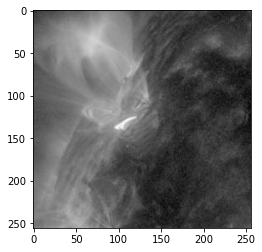

(1, 256, 256, 1)


In [35]:
image = test_in(img_lst[25])
print(image.shape)
image  = image/255.0

### Provide the correct label for evaluation

In [36]:
pre = np.array([1])
pre.shape

(1,)

### Evaluate the models

In [37]:
loss,acc = model1.evaluate(image, pre)
print("loss=",loss,"accuracy=",acc)

1/1 [==============================] - 0s 2ms/step - loss: 9.1791e-06 - accuracy: 1.0000
loss= 9.179073458653875e-06 accuracy= 1.0


In [38]:
loss,acc = model2.evaluate(image, pre)
print("loss=",loss,"accuracy=",acc)

1/1 [==============================] - 0s 3ms/step - loss: 5.1223e-04 - accuracy: 1.0000
loss= 0.0005122303264215589 accuracy= 1.0


In [39]:
loss,acc = model3.evaluate(image, pre)
print("loss=",loss,"accuracy=",acc)

1/1 [==============================] - 0s 980us/step - loss: 0.7464 - accuracy: 0.0000e+00
loss= 0.7464103102684021 accuracy= 0.0


## Predicting the presence o Solar flare in an image

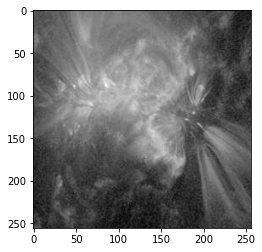

(1, 256, 256, 1)


In [40]:
image1 = test_in(img_lst[360])
print(image1.shape)
image1  = image1/255.0

In [41]:
class1= model2.predict_classes(image1)
if class1 == [1]:
    print("Image has flare")
else:
    print("Image does not have flare")


Image has flare


In [42]:
class2= model3.predict_classes(image1)
if class1 == [1]:
    print("Image has flare")
else:
    print("Image does not have flare")


Image has flare


In [43]:
class3= model1.predict_classes(image1)
if class1 == [1]:
    print("Image has flare")
else:
    print("Image does not have flare")

Image has flare
